<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/COMP90049/Week%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2023

## Week 6 - Linear Regression
---
## Assignment 1 Feedback

- Make sure you document your code well. It is not heavily assesed, but you will lose less marks if something goes wrong.
- Always make sure your code is reproducible, for the same reason as above.
- **Practice your report writing**. This will be marked strictly on report writing (likely Assignment 3)!
  - Consider trying $\LaTeX$
  - Give your report to a mate to read, see if they understand what you were saying.
- Always read the specs carefully. When in doubt, ask on Ed!

---
## Theoretical Questions


### 1. We are doing some feature selection today

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| A  | s    | h    | h    | F    | N    |
| B  | s    | h    | h    | T    | N    |
| C  | o    | h    | h    | F    | Y    |
| D  | r    | m    | h    | F    | Y    |
| E  | r    | c    | n    | F    | Y    |
| F  | r    | c    | n    | T    | N    |

#### (i). Which of `Humi=h` and `Wind=T` has the greatest Pointwise Mutual Information for the class Y? What about N?

Remember, for binary attributes: $PMI(A,C) = log_2\frac{P(A, C)}{P(A)P(C)}$

So:
- $PMI(Humi=h, Play=Y) = log_2\frac{2/6}{4/6 \times 3/6} = log_2 1 = 0 $
- $PMI(Wind=T, Play=Y) = log_2\frac{0}{2/6 \times 3/6} = log_2 0 = -∞ $

With `PLAY=Y`, `Wind` is (perfectly) negatively correlated, whereas `Humi` is (perfectly) uncorrelated.

#### (ii). Which of the attributes has the greatest Mutual Information for the class, as a whole?

MI formula: $MI(X,C) = \sum_{x,c} P(x,c)PMI(x,c)$, where $0\times log(0)=0$

$MI(Outl) \\= \sum_{x \in \{s,o,r\},\; c \in \{Y,N\}} P(x,c)PMI(x,c) \\= \sum_{x \in \{s,o,r\},\; c \in \{Y,N\}} P(x,c) log_2\frac{P(x,c)}{P(x)P(c)} = ... = 0.541 $

Similar way, you will get:
- MI(Temp) = 0.11
- MI(Humi) = 0
- MI(Wind) = 0.459

### 2. What is gradient descent? Why is it important?
- An iterative optimization method (remember, optimization is to minimize cost or error function)
- **Iteratively adjusting** the model's parameters in the **opposite direction of the gradient** of the cost function, to minimize the error or cost.
- Useful in situations where there is **no closed-form solution available** for finding the optimal parameters, as it can iteratively update the parameters until convergence.
- Common ML models with optimization: goal is to find the weights that minimize the error or cost function over a training dataset (e.g. linear/logistic regression, deep learning, SVM)

Characteristics:
- Learning rate $\alpha$:
  - Too small: Slow convergence, may stuck at local minima
  - Too big: Fast convergenge, unstable (may jump over global minimum)

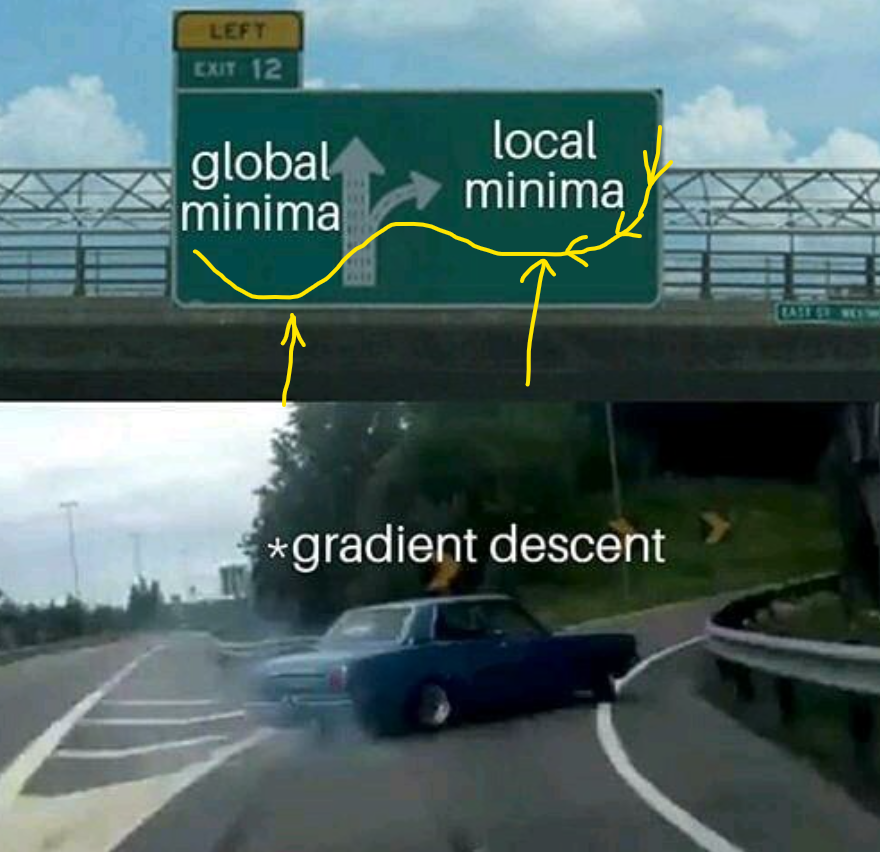

### 3. Build a Linear Regression model using the update rule for Gradient Descent with respect to Mean Squared Error (MSE): $\beta_k^{j+1} = \beta_k^{j} + \frac{2\alpha}{N} \sum^N_{i=1}x_{ik}(y_i-\hat{y}_i^j)$

x|y
---|---
1|1
2|2
2|3

#### Step 0: Choose your learning rate
Let $\frac{\alpha}{N}=0.05$

#### Step 1: Make an initial guess for $\hat{y} = β_0 + β_1x_1 + ...+ β_nx_n$
- n attribute ➡ n+1 $\beta$ values to be found: $β_0, ..., β_n$
- 1 attribute ➡ 2 $\beta$ values to be found: $β_0, β_1$

Initiate $β_0 = β_1 = 0$: $\hat{y} = 0 + 0x$

#### Step 2: Predict and compare

x|$\hat{y}$ = 0 + 0x|$y$|Error = $y$-$\hat{y}$
---|---|---|---
1|0|1|1
2|0|2|2
2|0|3|3

#### Step 3: Update

- $β_0 = \beta_0 + 2×0.05[1 + 2 + 3] = 0.6$ (remember: $x_{i0}=1 \;∀ \;i$)
- $β_1 = \beta_1 + 2×0.05[1×1 + 2×2 + 2\times 3] = 1.1$

Model now becomes $\hat{y} = 0.6 + 1.1x$

#### Step 4: Repeat 2 and 3 (give it a try yourself)

x|$\hat{y}$ = 0.6 + 1.1x|$y$|Error = $y$-$\hat{y}$
---|---|---|---
1|1.7|1|-0.7
2|2.8|2|-0.8
2|2.8|3|0.2

- $β_0 = \beta_0 + 2×0.05[-0.7 -0.8 +0.2] = 0.47$
- $β_1 = \beta_1 + 2×0.05[-1×0.7 - 2×0.8 + 2\times 0.2] = 0.91$

Model now becomes $\hat{y} = 0.47 + 0.91x$

#### Step ???: Check your MSE!

Compare MSE of previous iteration vs. current:
- Bigger (prev > present): looking good. If it's been like this for a long time, maybe increase learning rate
- Smaller (prev < present) right from the start: diverging ▶ reduce your learning rate
- Smaller after a while (was bigger all the way before): probably you are at the sweetspot. Want to be more accurate? ▶ reduce your learning rate

And then there is Momentum, RMSProp, ADAM,....

### 4. We have a dataset that includes features size (in cm), distance (in km) and gap (in μm). What is the most appropriate evaluation metric for finding the best regression model?

- MSE/RMSE: Measure accuracy but sensitive to outliers
- Pearson's correlation: Value range [-1,1]. Measure correlation strength of linear relationship. But cannot measure accuracy, and does not work for non-linear relationships
- RRSE: a variation of RMSE that normalizes the error by the range of the dependent variable

In the given scenario since we have many different units it is more appropriate that we use RRSE as it scales the error metric by the magnitude of the target variable, which can help to account for differences in units and make the error metric more comparable across different features.

However, the choice of evaluation metric ultimately depends on the specific goals of the analysis, as well as any domain-specific considerations that may be relevant.